### Insurance data- Class activity( assignment)

28 december

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Statistical Summary

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Missing and Duplicated Values

In [53]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

### Encoding of Categorical columns

In [9]:
# One-hot encoding 
df['sex'] = df['sex'].map({'male': 1, 'female': 2})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
region_mapping = {'southeast': 10, 'southwest': 11, 'northeast': 20, 'northwest': 21}
df['region'] = df['region'].map(region_mapping)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,11,16884.92400
1,18,1,33.770,1,0,10,1725.55230
2,28,1,33.000,3,0,10,4449.46200
3,33,1,22.705,0,0,21,21984.47061
4,32,1,28.880,0,0,21,3866.85520


### Distribution of Age,BMI, Charegs after Normalization

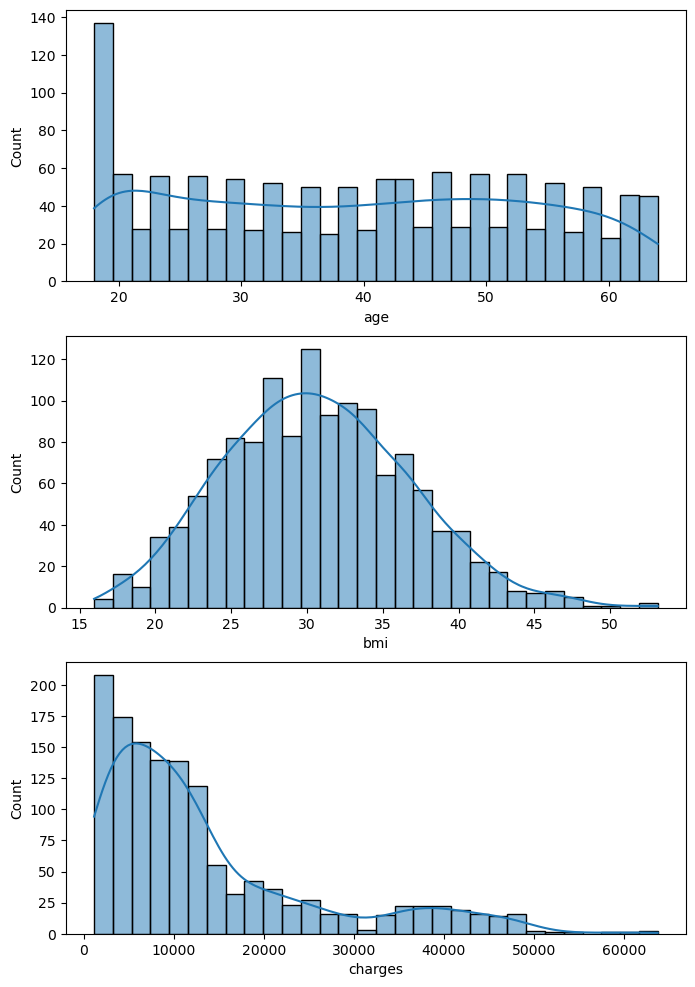

In [10]:
#Normalizing and standardizing 'bmi' and 'charges' columns
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

df[['bmi_norm', 'charges_norm']] = scaler_norm.fit_transform(df[['bmi', 'charges']])
df[['bmi_std', 'charges_std']] = scaler_std.fit_transform(df[['bmi', 'charges']])

#Analyzing the distribution of key variables: age, bmi, and charges
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

#Plotting the histogram for age
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0])
#Plotting the histogram for bmi
sns.histplot(df['bmi'], bins=30, kde=True, ax=axes[1])
#Plotting the histogram for charges
sns.histplot(df['charges'], bins=30, kde=True, ax=axes[2])

#Showing the figure
plt.show()

#### Correlation Matrix

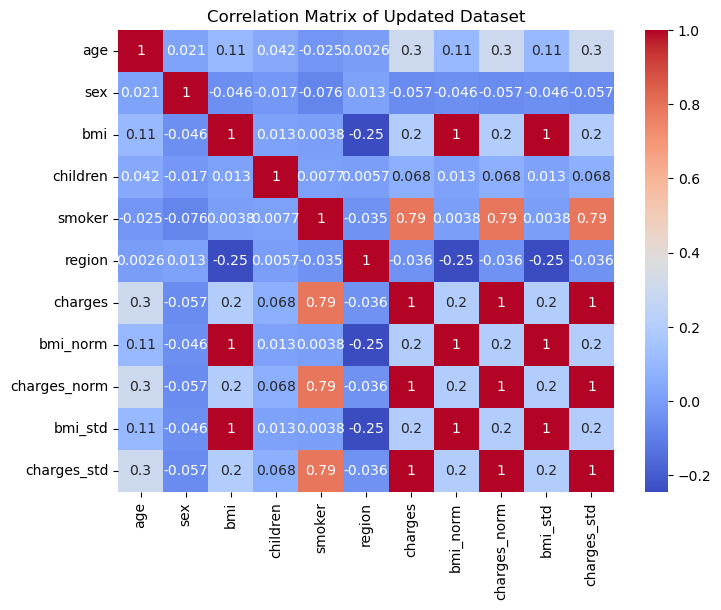

In [11]:
corr_matrix_updated = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_updated, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Updated Dataset')
plt.show()

### Visualization of Features

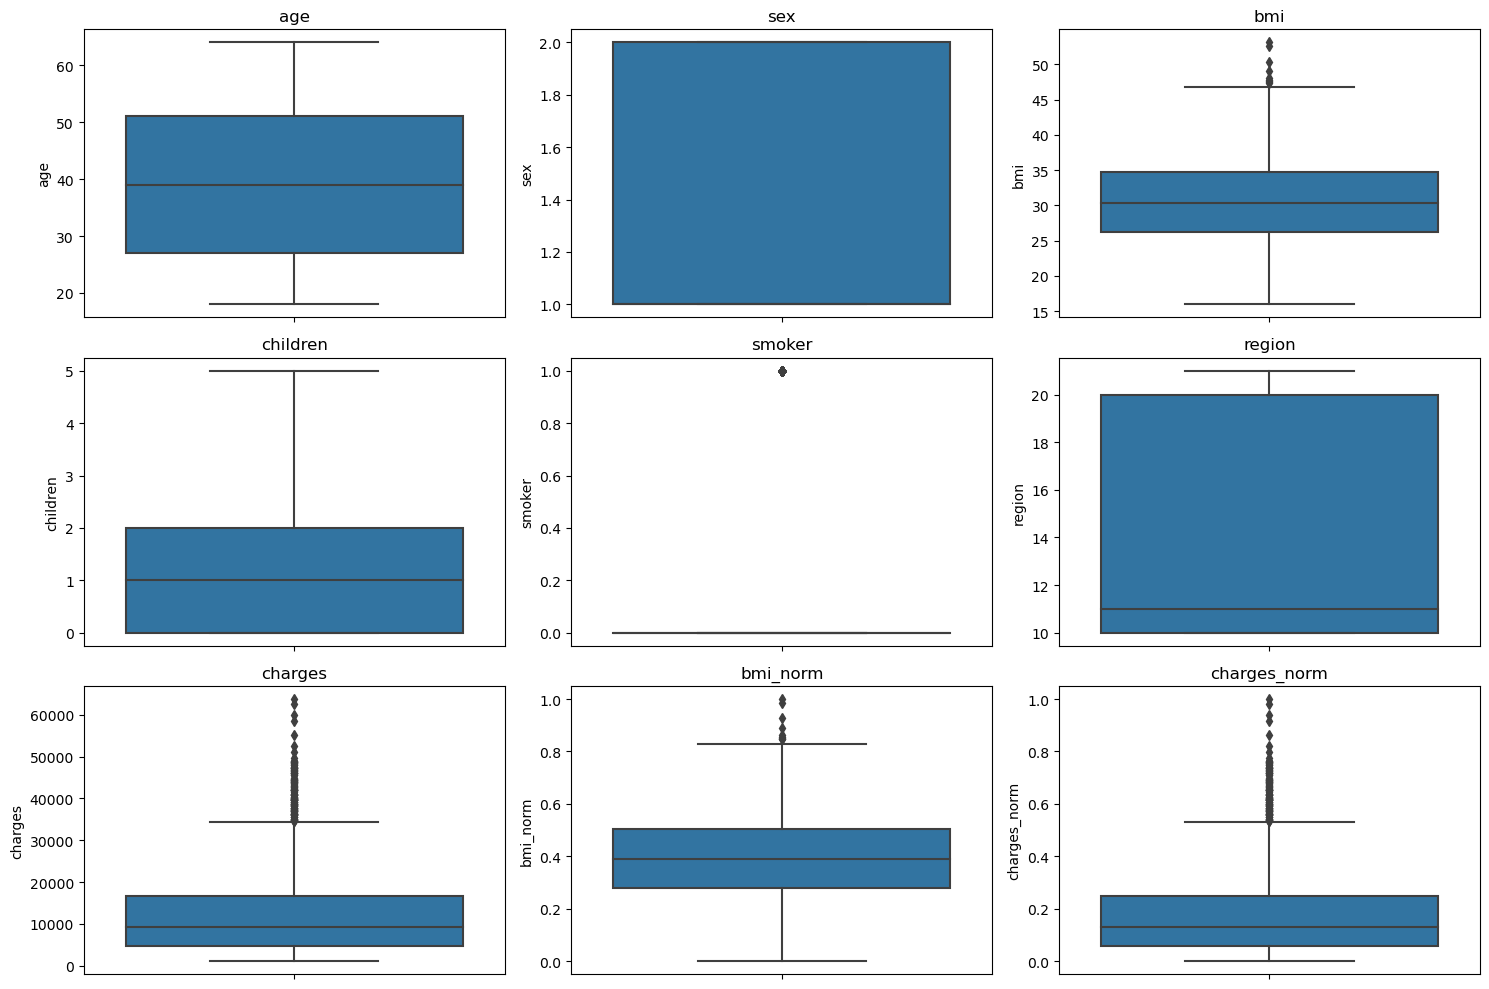

In [12]:
features_updated = df.columns[:9]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_updated):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

### Linera Regression Model

In [13]:
#Splitting the dataset into training and testing sets
X = df.drop('charges_norm', axis=1)
y = df['charges_norm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# c - Evaluating model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse

(1.0, 5.215251806650467e-33)

### CO-effiecients of Linear Regression Model

In [14]:
#Interpreting the coefficients of the linear regression model
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

#Evaluating the impact of different features on medical charges
coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
6,charges,1.596206e-05
9,charges_std,1.318581e-09
4,smoker,2.627511e-16
2,bmi,4.922569e-18
3,children,3.822069e-18
0,age,3.712981e-18
5,region,1.335460e-18
8,bmi_std,8.075201e-19
7,bmi_norm,1.324339e-19
1,sex,-2.467555e-17


### Ridge and Lasso model employment

In [15]:
from sklearn.linear_model import Ridge, Lasso

# Implementing Ridge and Lasso regression models
ridge_model = Ridge(random_state=42)
lasso_model = Lasso(random_state=42)

# Training Ridge model
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Training Lasso model
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Results
r2_ridge, mse_ridge, r2_lasso, mse_lasso

(1.0, 6.676086270185787e-24, 0.99999981688579, 6.840784642559704e-09)

#### R-squared (R2)
is a metric that measures the goodness of fit of a regression model. It ranges from 0 to 1, with 1 indicating a perfect fit where the model explains all the variability in the data. In this case, both the Ridge and Lasso models have very high R2 values close to 1, suggesting that they are excellent at explaining the variance in the target variable. This means that the models fit the data very well.

#### Mean Squared Error (MSE):
Mean Squared Error (MSE) is a metric that measures the average squared difference between the actual and predicted values in a regression model. A lower MSE indicates better model performance. In this case the Ridge model has an extremely low MSE (close to zero), which indicates that it has very small prediction errors.
The Lasso model also has a low MSE but slightly higher than Ridge, suggesting that it may have slightly larger prediction errors compared to Ridge, but still very small.
In summary, both the Ridge and Lasso models seem to perform exceptionally well on this dataset, as indicated by their high R2 values and very low MSE values. They are likely very good models for explaining and predicting the target variable in your regression problem, with Ridge potentially having a slight edge in terms of MSE.

##### Sensitivity Analysis

In [16]:
from sklearn.model_selection import GridSearchCV


# Setting up parameter grids for Ridge and Lasso
ridge_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
lasso_params = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Setting up GridSearchCV for Ridge and Lasso
ridge_grid_search = GridSearchCV(Ridge(random_state=42), ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search = GridSearchCV(Lasso(random_state=42, max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error')

# Performing grid search for Ridge
ridge_grid_search.fit(X_train, y_train)
ridge_best_params = ridge_grid_search.best_params_
ridge_best_score = ridge_grid_search.best_score_

# Performing grid search for Lasso
lasso_grid_search.fit(X_train, y_train)
lasso_best_params = lasso_grid_search.best_params_
lasso_best_score = lasso_grid_search.best_score_

# Outputting the best parameters and best scores
print("Best Parameters for Ridge:", ridge_best_params)
print("Best Score for Ridge:", ridge_best_score)
print("Best Parameters for Lasso:", lasso_best_params)
print("Best Score for Lasso:", lasso_best_score)


Best Parameters for Ridge: {'alpha': 0.001}
Best Score for Ridge: -1.2544200721012588e-29
Best Parameters for Lasso: {'alpha': 0.001}
Best Score for Lasso: -6.9343500498448385e-15


### Best Parameters for Ridge: {'alpha': 0.001}
This indicates that the best hyperparameter value (alpha) for the Ridge regression model was found to be 0.001. In Ridge regression, alpha is a regularization parameter that controls the strength of regularization. Smaller values of alpha result in weaker regularization, while larger values of alpha increase the strength of regularization.
#### Best Score for Ridge: -1.2544200721012588e-29
The "Best Score" represents the evaluation metric used for hyperparameter tuning (often negative mean squared error or a similar metric). In this case, the score is a very small negative value close to zero, which indicates that the Ridge model with alpha = 0.001 achieved an extremely low mean squared error (MSE) or a similar loss metric on the validation or training data. A lower MSE or loss value is generally better, so a score close to zero or negative is excellent.
Best Parameters for Lasso: {'alpha': 0.001}

###### Lasso score for Ridge:
This indicates that the best hyperparameter value (alpha) for the Lasso regression model was found to be 0.001.
##### Best Score for Lasso: -6.9343500498448385e-15
 Tht Score" represents the evaluation metric used for hyperparameter tuning, and in this case, it's a very small negative value close to zero. It means that the Lasso model with alpha = 0.001 achieved an extremely low MSE or loss value on the validation or training data.
In conclusion, both the Ridge and Lasso models with an alpha value of 0.001 performed exceptionally well, as indicated by their very low negative scores. These models likely fit the data very closely and have low prediction errors. The selection of alpha = 0.001 suggests that moderate regularization was applied to these models, which can help prevent overfitting while still maintaining high predictive accuracy.